In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## 1. Multi Linear Regression 

In [13]:
# load data
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))

In [14]:
# turn X, Y into numpy arrays
X = np.array(X)
Y = np.array(Y)

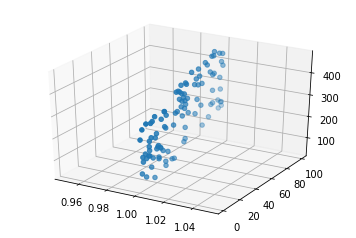

In [18]:
# let's plot the data to see what the data looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [19]:
# calculate weights 
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
yhat = np.dot(X, w)

### 2. R square

In [23]:
d1 = Y - yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)

In [22]:
print(r2)

0.998004061248


## 2. Polynomial Regression

In [31]:
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x])
    Y.append(float(y))

In [32]:
X = np.array(X)
Y = np.array(Y)

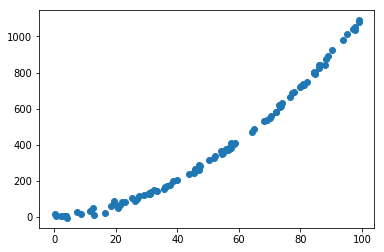

In [33]:
plt.scatter(X[:,1], Y)
plt.show()

In [34]:
# calculate weights
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

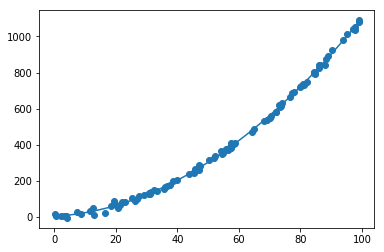

In [35]:
# plot it all together
plt.scatter(X[:, 1], Y)
plt.plot(sorted(X[:,1]), sorted(Yhat))
plt.show()

# 3. Real Example

In [38]:
import pandas as pd

In [37]:
!pip install xlrd

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel('./mlr02.xls')
X = df.as_matrix()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


- X1: systolic blood pressure
- X2: age in years
- X3: weight in pounds

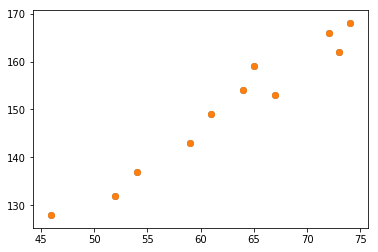

In [43]:
plt.scatter(X[:,1], X[:, 0])
plt.show()

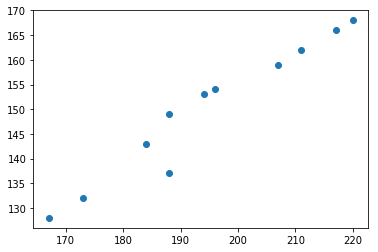

In [44]:
plt.scatter(X[:,2], X[:,0])
plt.show()

In [45]:
df['ones'] = 1

In [47]:
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
x2only = df[['X2', 'ones']]
x3only = df[['X3', 'ones']]

In [48]:
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [49]:
print("r2 for x2 only", get_r2(x2only, Y))
print("r2 for x3 only", get_r2(x3only, Y))
print("r2 for both", get_r2(X, Y))


r2 for x2 only 0.957840720815
r2 for x3 only 0.941995208529
r2 for both 0.97684710415
